In [1]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt

/Users/hunterlybbert/.pyenv/versions/uw-dev-env/lib/python3.11/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'pyogrio_837ab1c66668497594cf06e9f53f2c46': 'counties' (default), 'states', 'TopoJSON'. Specify layer parameter to avoid this warning.
  result = read_func(


<Axes: >

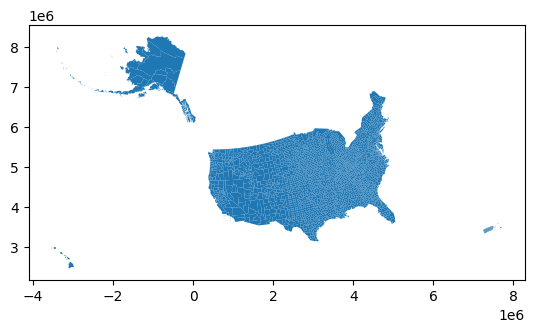

In [2]:
gdf = gpd.read_file('https://cdn.jsdelivr.net/npm/vega-datasets@2.8.0/data/us-10m.json')
gdf.set_crs(epsg=4326, inplace=True)
gdf.to_crs(epsg=32610, inplace=True)
gdf.plot()

In [3]:
gdf.head()

,id,geometry
0,22051,MULTIPOLYGON EMPTY
1,53000,"POLYGON ((525498.113 5361964.573, 525498.113 5..."
2,53073,"MULTIPOLYGON (((656986.611 5429688.218, 663435..."
3,30105,"POLYGON ((1732508.803 5566309.844, 1734067.745..."
4,30029,"POLYGON ((1152811.382 5465889.29, 1155047.349 ..."


In [4]:
gdf["id"] = gdf["id"].astype(int)
gdf

,id,geometry
0,22051,MULTIPOLYGON EMPTY
1,53000,"POLYGON ((525498.113 5361964.573, 525498.113 5..."
2,53073,"MULTIPOLYGON (((656986.611 5429688.218, 663435..."
3,30105,"POLYGON ((1732508.803 5566309.844, 1734067.745..."
4,30029,"POLYGON ((1152811.382 5465889.29, 1155047.349 ..."
...,...,...
3226,72037,"MULTIPOLYGON (((7505533.649 3501398.654, 75055..."
3227,72069,"POLYGON ((7498042.946 3475026.628, 7497377.948..."
3228,72147,"POLYGON ((7538793.582 3475652.294, 7528243.601..."
3229,78010,"POLYGON ((7673931.847 3457598.695, 7670534.163..."


In [5]:
def get_state_id(row):
    return int(str(row["id"])[:2])

gdf["state_id"] = gdf.apply(get_state_id, axis=1)
wa_county_mask = (gdf["state_id"] == 53) & (gdf["id"] > 53000)

wa_gdf = gdf[wa_county_mask]

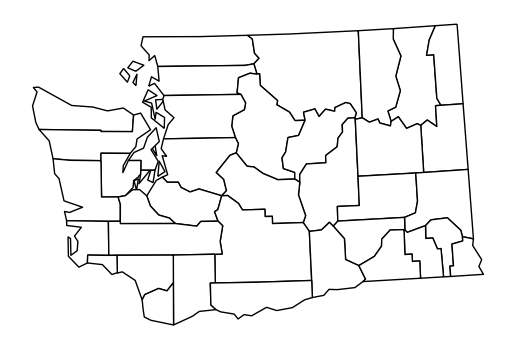

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

wa_gdf.plot(ax=ax, color="white", edgecolor="black")
ax.axis('off')
plt.show()

In [7]:
wa_population = pd.read_csv("../../data/wa_population.csv")
wa_population.head()

,County,Census2020,Estimate2021,Estimate2022,GEOID_AFF,GEOID_TIGER
0,Adams,20613,20900,21100,0500000US53001,53001
1,Asotin,22285,22500,22600,0500000US53003,53003
2,Benton,206873,209400,212300,0500000US53005,53005
3,Chelan,79141,80000,80650,0500000US53007,53007
4,Clallam,77155,77750,77625,0500000US53009,53009


In [8]:
wa_population["id"] = wa_population["GEOID_TIGER"].astype(int)
wa_population.head()

,County,Census2020,Estimate2021,Estimate2022,GEOID_AFF,GEOID_TIGER,id
0,Adams,20613,20900,21100,0500000US53001,53001,53001
1,Asotin,22285,22500,22600,0500000US53003,53003,53003
2,Benton,206873,209400,212300,0500000US53005,53005,53005
3,Chelan,79141,80000,80650,0500000US53007,53007,53007
4,Clallam,77155,77750,77625,0500000US53009,53009,53009


In [9]:
wa_gdf.head()

,id,geometry,state_id
2,53073,"MULTIPOLYGON (((656986.611 5429688.218, 663435...",53
18,53047,"POLYGON ((804496.029 5435825.184, 809738.888 5...",53
19,53065,"POLYGON ((907088.506 5442476.109, 898949.674 5...",53
20,53051,"POLYGON ((935959.976 5444495.714, 937293.982 5...",53
21,53019,"POLYGON ((851206.269 5438589.165, 851038.715 5...",53


In [10]:
wa_gdf

,id,geometry,state_id
2,53073,"MULTIPOLYGON (((656986.611 5429688.218, 663435...",53
18,53047,"POLYGON ((804496.029 5435825.184, 809738.888 5...",53
19,53065,"POLYGON ((907088.506 5442476.109, 898949.674 5...",53
20,53051,"POLYGON ((935959.976 5444495.714, 937293.982 5...",53
21,53019,"POLYGON ((851206.269 5438589.165, 851038.715 5...",53
31,53055,"MULTIPOLYGON (((508497.417 5362809.201, 504510...",53
33,53057,"MULTIPOLYGON (((525498.113 5361964.573, 529152...",53
38,53007,"POLYGON ((669582.238 5377949.041, 673010.183 5...",53
46,53029,"MULTIPOLYGON (((544229.312 5344286.465, 544780...",53
47,53009,"MULTIPOLYGON (((505347.249 5323519.495, 503757...",53


In [11]:
wa_complete = wa_gdf.merge(
    wa_population,
    on="id",
)
wa_complete.head()

,id,geometry,state_id,County,Census2020,Estimate2021,Estimate2022,GEOID_AFF,GEOID_TIGER
0,53073,"MULTIPOLYGON (((656986.611 5429688.218, 663435...",53,Whatcom,226847,226300,231650,0500000US53073,53073
1,53047,"POLYGON ((804496.029 5435825.184, 809738.888 5...",53,Okanogan,42104,42350,42700,0500000US53047,53047
2,53065,"POLYGON ((907088.506 5442476.109, 898949.674 5...",53,Stevens,46445,46725,47050,0500000US53065,53065
3,53051,"POLYGON ((935959.976 5444495.714, 937293.982 5...",53,Pend Oreille,13401,13475,13625,0500000US53051,53051
4,53019,"POLYGON ((851206.269 5438589.165, 851038.715 5...",53,Ferry,7178,7250,7300,0500000US53019,53019


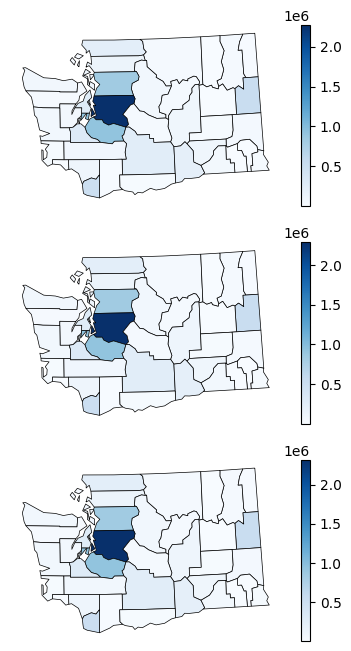

In [12]:
fig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(311)
ax1 = fig.add_subplot(312)
ax2 = fig.add_subplot(313)

wa_complete.plot(ax=ax, column="Census2020", cmap="Blues", edgecolor="black", linewidth=0.5, legend=True)
wa_complete.plot(ax=ax1, column="Estimate2021", cmap="Blues", edgecolor="black", linewidth=0.5, legend=True)
wa_complete.plot(ax=ax2, column="Estimate2022", cmap="Blues", edgecolor="black", linewidth=0.5, legend=True)

ax.axis('off')
ax1.axis('off')
ax2.axis('off')
plt.show()

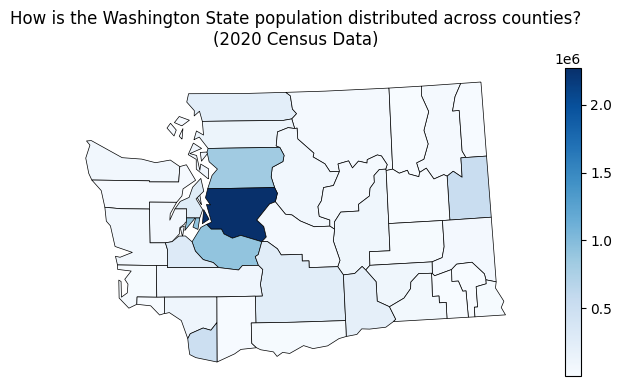

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
wa_complete.plot(ax=ax, column="Census2020", cmap="Blues", edgecolor="black", linewidth=0.5, legend=True)
ax.axis('off')
plt.title("How is the Washington State population distributed across counties?\n(2020 Census Data)")
plt.savefig("wa_population.png", dpi=300, bbox_inches="tight")
plt.show()

## Reflection:
#### Useful takeaways
* I had a hard time using python jupyter notebooks since the assignment was written for Observable notebooks. Takeaway is that I could probably benefit from learning how to use observable notebooks.
* Additionally, I realized how great it is to be able to use a variety of tools including geopandas and other python libraries to help with visualization.
* Lastly, it is interesting that the population is so high in king county relative to other counties that it really washes out any details that could help us differentiate between county populations in much of eastern washington as well as on the Olympic peninsula. 